In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 


Importing Data

In [2]:
data=pd.read_csv('Position_Salaries.csv')
print(data.head())

Position  Level  Salary
0   Business Analyst      1   45000
1  Junior Consultant      2   50000
2  Senior Consultant      3   60000
3            Manager      4   80000
4    Country Manager      5  110000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Position  10 non-null     object
 1   Level     10 non-null     int64 
 2   Salary    10 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 368.0+ bytes


In [4]:
data.describe()

,Level,Salary
count,10.00000,10.000000
mean,5.50000,249500.000000
std,3.02765,299373.883668
min,1.00000,45000.000000
25%,3.25000,65000.000000
50%,5.50000,130000.000000
75%,7.75000,275000.000000
max,10.00000,1000000.000000


Checking for null entries

In [5]:
data.isnull().sum()

Position    0
Level       0
Salary      0
dtype: int64

Data Splitting

In [6]:
x=data.iloc[:,1].values.reshape(-1,1)
y=data.iloc[:,-1].values.reshape(-1,1)

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

Linear Regression Model

In [8]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [9]:
lr_pre=lr.predict(x_test)
print(lr_pre)

[[ 70675.67567568]
 [408851.35135135]]


In [10]:
lr.score(x_train,y_train)

0.7704729767407513

In [11]:
from sklearn.metrics import r2_score
r2_score(y_test,lr_pre)

0.20875804696637434

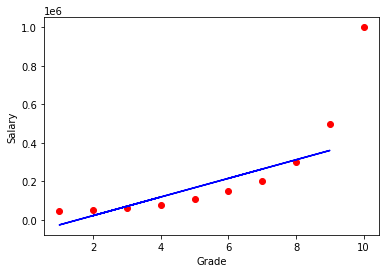

In [12]:
plt.scatter(x,y,color='red')
plt.plot(x_train,lr.predict(x_train),color='blue')
plt.xlabel('Grade')
plt.ylabel('Salary')
plt.show()

Polynomial Linear regression Model

In [13]:
from sklearn.preprocessing import PolynomialFeatures
pf=PolynomialFeatures(degree=2)
x_p=pf.fit_transform(x)
lr_2=LinearRegression()
lr_2.fit(x_p,y)

LinearRegression()

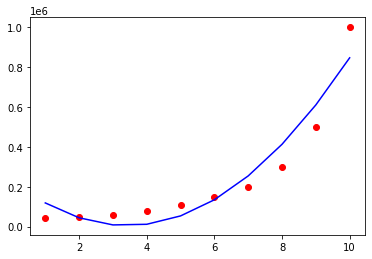

In [14]:
plt.scatter(x,y,color='red')
plt.plot(x,lr_2.predict(x_p),color='blue')

In [17]:
lr_2.score(x_p,y)

0.9162082221443942

Result of changing degree

In [24]:
from sklearn.preprocessing import PolynomialFeatures
pf=PolynomialFeatures(degree=4)
x_p=pf.fit_transform(x)
lr_3=LinearRegression()
lr_3.fit(x_p,y)

LinearRegression()

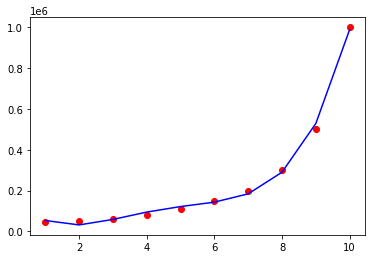

In [25]:
plt.scatter(x,y,color='red')
plt.plot(x,lr_3.predict(x_p),color='blue')

In [26]:
lr_3.score(x_p,y)

0.9973922891706615

In [28]:
r2_score(y,lr_3.predict(x_p))

0.9973922891706615

Predicting using final model

In [30]:
lr_3.predict(pf.fit_transform([[6.6]]))

array([[162939.89743593]])